# Figure 10 for corrigendum to 2016 JAMES Tracmip introduction paper

Data is taken from ESGF copy of TRACMIP at KIT SCC LSDFONLINE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle

# my module functions to load tracmip data, plot colors, model names etc.
import tracmip as tm

import warnings
warnings.filterwarnings("ignore")

## Load surface temperature

In [2]:
ts_aqct = np.array(np.load('./postdata_npz/ts_aquaControlTRACMIP.timmean.npz')['ts'])
ts_ldct = np.array(np.load('./postdata_npz/ts_landControlTRACMIP.timmean.npz')['ts'])

## Plotting

In [3]:
def make_niceplot(ax, modelname):
    ax.xaxis.set_ticks([-120, -60, 0, 60, 120])
    ax.xaxis.set_ticklabels([''], fontsize=11)
    ax.yaxis.set_ticks([-0.866, -0.5, 0, 0.5, 0.866])
    ax.yaxis.set_ticklabels([''], fontsize=11) 
    plt.text(0.03, 0.93, modelname, fontsize=15, ha='left', va='center', \
             transform=ax.transAxes, backgroundcolor='white')
    plt.xlim(-175, 175), plt.ylim(-0.98, 0.98)  

In [4]:
sinlat = np.sin(tm.latint*np.pi/180)

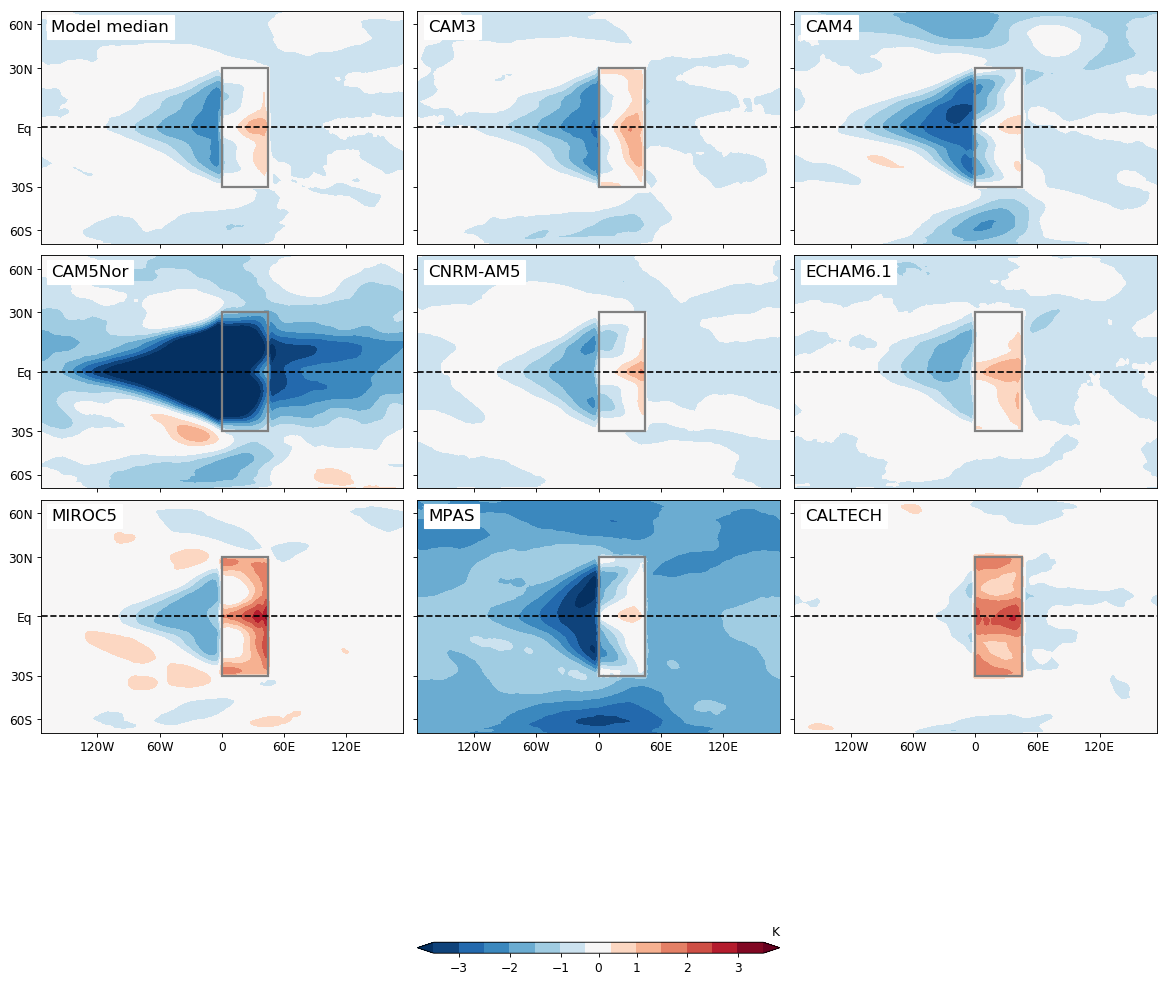

In [5]:
plt.figure(figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k' )
clev = np.array([-3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])

ax = plt.subplot(4, 3, 1)
c = plt.contourf(tm.lonint, sinlat, np.nanmedian((ts_ldct-ts_aqct)[tm.modlist_ldct], axis=0), clev, extend='both', cmap=cm.RdBu_r)
ax.add_patch(Rectangle((0, -0.5), 45, 1, alpha=1, facecolor='none', edgecolor='gray', linewidth=2))
plt.plot([-200, 200], [0, 0], 'k--')
make_niceplot(ax, 'Model median')
ax.yaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=11) 

ax = plt.subplot(4, 3, 11)
ax.axis('off')
cbar = plt.colorbar(c, ticks=[-3, -2, -1, 0, 1, 2, 3], orientation='horizontal', aspect=30)
cbar.ax.tick_params(labelsize=11)
plt.text(1, -0.17, 'K', fontsize=11, ha='right')  

for m in tm.modlist_ldct:
    if tm.modnames[m] == 'CAM3'     : msubplot = 2 
    if tm.modnames[m] == 'CAM4'     : msubplot = 3 
    if tm.modnames[m] == 'CAM5Nor'  : msubplot = 4
    if tm.modnames[m] == 'CNRM-AM5' : msubplot = 5 
    if tm.modnames[m] == 'ECHAM61' : msubplot = 6
    if tm.modnames[m] == 'MIROC5'   : msubplot = 7  
    if tm.modnames[m] == 'MPAS'     : msubplot = 8
    if tm.modnames[m] == 'CALTECH'  : msubplot = 9
    ax = plt.subplot(4, 3, msubplot)
    c = plt.contourf(tm.lonint, sinlat, (ts_ldct-ts_aqct)[m, :, :], clev, extend='both', cmap=cm.RdBu_r)
    ax.add_patch(Rectangle((0, -0.5), 45, 1, alpha=1, facecolor='none', edgecolor='gray', linewidth=2))
    plt.plot([-200, 200], [0, 0], 'k--')
    make_niceplot(ax, tm.modnames_4plots[m])
    if (msubplot == 7) or (msubplot == 8) or (msubplot == 9):
        ax.xaxis.set_ticklabels(['120W', '60W', '0', '60E', '120E'], fontsize=11) 
    if msubplot in [1, 4, 7]:
        ax.yaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=11)

plt.subplots_adjust(wspace=0.04, hspace=0.05) 

plt.tight_layout
plt.savefig('figs/corrigendumpaper_figure10.pdf')